
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [4]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for visualizations
from matplotlib import pyplot as plt # used for plots and charts
import pylab # used for creating plots
!pip install pingouin # used for statistical tests and visualization

df_mh = pd.read_csv('/content/drive/MyDrive/Analysing Data/MillerHadenData.csv')

  Using cached pingouin-0.5.4-py2.py3-none-any.whl (198 kB)
  Using cached pandas_flavor-0.6.0-py3-none-any.whl (7.2 kB)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Q1a (code):
# Display first few rows of the dataframe
df_mh.head()
# Check data types and information
df_mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [19]:
# Q1b (code):
# Check for missing values
missing_values = df_mh.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check whether there is a data point for each participant on both variables
#checking through boolean values
boolean = df_mh[['Participant', 'Abil', 'IQ', 'Home', 'TV']].notna().all(axis=1)
if boolean.all():
    print("All participants have data on both variables.")
else:
    print("Participants are missing data.")

#Earlier I created a new dataframe for participants with no missing values but that would not tell us whether there are missing values or not
participants_with_no_missing_values = df_mh.dropna(subset=['Participant', 'Abil', 'IQ', 'Home', 'TV'])
print("Participants with no missing values:")
print(participants_with_no_missing_values)
#As there were no participants with missing values the code ahead continues to use the original df_mh

Missing Values:
Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64
All participants have data on both variables.
Participants with no missing values:
    Participant  Abil   IQ  Home   TV
0             1    61  107   144  487
1             2    56  109   123  608
2             3    45   81   108  640
3             4    66  100   155  493
4             5    49   92   103  636
5             6    62  105   161  407
6             7    61   92   138  463
7             8    55  101   119  717
8             9    62  118   155  643
9            10    61   99   121  674
10           11    51  104    93  675
11           12    48  100   127  595
12           13    50   95    97  673
13           14    50   82   140  523
14           15    67  114   151  665
15           16    51   95   112  663
16           17    55   94   102  684
17           18    54  103   142  505
18           19    57   96   127  541
19           20    54  104   102  678
20   

       Participant       Abil          IQ        Home          TV
count    25.000000  25.000000   25.000000   25.000000   25.000000
mean     13.000000  55.120000  100.040000  124.000000  599.920000
std       7.359801   6.084954    9.043782   21.039645   95.056965
min       1.000000  45.000000   81.000000   87.000000  407.000000
25%       7.000000  50.000000   95.000000  108.000000  523.000000
50%      13.000000  54.000000  100.000000  123.000000  636.000000
75%      19.000000  61.000000  104.000000  141.000000  673.000000
max      25.000000  67.000000  118.000000  161.000000  787.000000


array([[<Axes: title={'center': 'Participant'}>,
        <Axes: title={'center': 'Abil'}>],
       [<Axes: title={'center': 'IQ'}>, <Axes: title={'center': 'Home'}>],
       [<Axes: title={'center': 'TV'}>, <Axes: >]], dtype=object)

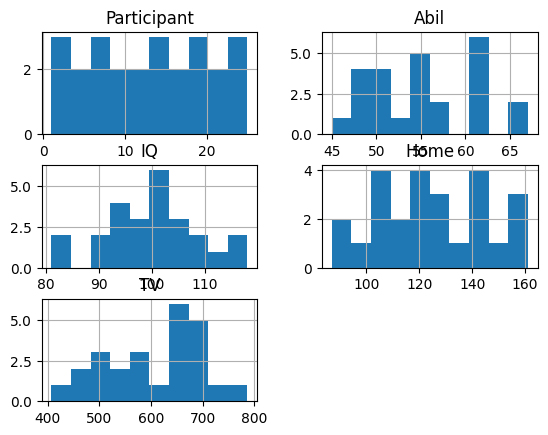

In [16]:
# Q1c (code):
# Checking data distribution using descriptive statistics
print(df_mh.describe())
df_mh.hist()

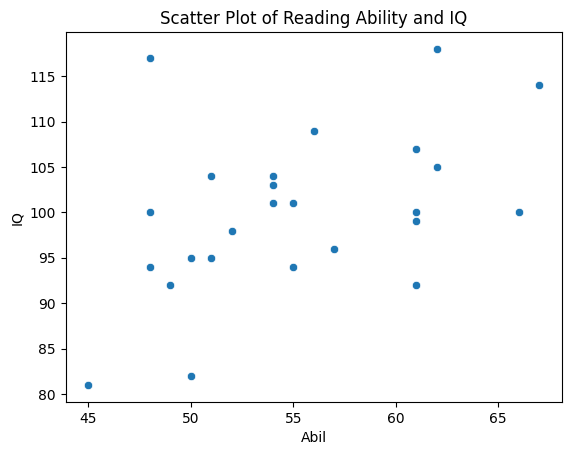

In [24]:
# Q1d (code):
# Scatter plot
sns.scatterplot(x='Abil', y='IQ', data=df_mh)
plt.title('Scatter Plot of Reading Ability and IQ')
plt.show()

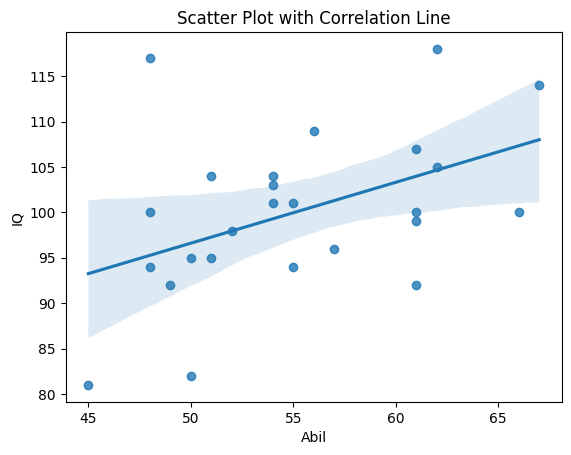

          n        r         CI95%     p-val   BF10     power
pearson  25  0.45117  [0.07, 0.72]  0.023593  2.804  0.640299


In [32]:
# Q1e (code):
# Correlation line
sns.regplot(x='Abil', y='IQ', data=df_mh)
plt.title('Scatter Plot with Correlation Line')
plt.xlabel('Abil')
plt.ylabel('IQ')
plt.show()

# Calculate and display the correlation coefficient
Abil = df_mh['Abil']
IQ = df_mh['IQ']
import pingouin as pg
corr_coeff = pg.corr(Abil, IQ)
print(corr_coeff)

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [ ]:
# Q2a (answer with words):
#Pearson is used for a linear relationship and coefficient 0.45117 is indicating a positive linear relationship between the variables.

In [35]:
# Q2b (code):
# Calculate correlation using pingouin

#result = pg.corr(df_mh['Abil'], df_mh['IQ'], tail='two-sided', method='pearson')
#ValueError: Since Pingouin 0.4.0, the 'tail' argument has been renamed to 'alternative'
corr_coeff = pg.corr(df_mh['Abil'], df_mh['IQ'], alternative='two-sided', method='pearson')
print(corr_coeff)

          n        r         CI95%     p-val   BF10     power
pearson  25  0.45117  [0.07, 0.72]  0.023593  2.804  0.640299


In [ ]:
# Q2c (answer with words):
#The correlation coefficient (r) 0.45117 is positive indicating that the values of 'Abil' and 'IQ' are directly related.
#The strength of the association (r) is a little under 0.5 which is considered moderately strong association between the variables.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [ ]:
# Q3a (answer in words):
# H0: There are no significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability).
# H1: There are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability).

In [37]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for data manipulation and data analysis
from scipy.stats import chi2_contingency ##used for conducting chi-squared test on contingency table
import numpy as np

# Define the rounded average for Reading Ability and Home
average_reading_ability = round(df_mh['Abil'].mean())
average_home_time = round(df_mh['Home'].mean())
# Create the Rank_Abil column
df_mh['Rank_Abil'] = np.where(df_mh['Abil'] <= average_reading_ability, 'Low', 'High')
# Create the Rank_Home column
df_mh['Rank_Home'] = np.where(df_mh['Home'] <= average_home_time, 'Infrequent', 'Frequent')
print(df_mh.head())

   Participant  Abil   IQ  Home   TV Rank_Abil   Rank_Home
0            1    61  107   144  487      High    Frequent
1            2    56  109   123  608      High  Infrequent
2            3    45   81   108  640       Low  Infrequent
3            4    66  100   155  493      High    Frequent
4            5    49   92   103  636       Low  Infrequent


In [40]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])

# Display the Contingency Matrix
print("\nContingency Matrix:")
print(contingency_matrix)


Contingency Matrix:
Rank_Home  Frequent  Infrequent
Rank_Abil                      
High              8           2
Low               3          12


In [47]:
# Q3d (code):
# Perform the Chi-square test
chi2, p_value, degree_of_freedom, expected_frequencies = chi2_contingency(contingency_matrix)

# Display the results
print('chi2=',chi2, 'p_value=', p_value)
print('These are the expected frequencies')
print(expected_frequencies)

# Check for significance based on p-value
if p_value < 0.05:
    print("The observed differences are statiscally significant - H0 is rejected")
else:
    print("The observed differences are not statiscally significant - H1 is rejected")

chi2= 6.500270562770561 p_value= 0.010785807794066234
These are the expected frequencies
[[4.4 5.6]
 [6.6 8.4]]
The observed differences are statiscally significant - H0 is rejected


In [ ]:
 # Q3e (answer in words):
#The observed differences are statiscally significant so the null hypothesis H0 is rejected.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [50]:
import pandas as pd # used for data analysis
from scipy import stats # used for statistical analysis
import numpy as np # used for numerical operations and manipulation
import matplotlib.pyplot as plt ## used for data visualization
import seaborn as sns # used for data visualization

# Load the data
df_evaluators = pd.read_csv('/content/drive/MyDrive/Analysing Data/evaluators.csv')
df_evaluators.head()

,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [52]:
# Q4a (code):
# Calculate mean and standard deviation for age
mean_age = df_evaluators['age'].mean()
std_age = df_evaluators['age'].std()
print(f"Mean Age: {mean_age}")
print(f"Standard Deviation of Age: {std_age}")

Mean Age: 30.852941176470587
Standard Deviation of Age: 6.238358141327351


In [60]:
# Q4b (code)
# Count male and female evaluators

#Counting the number of male and female evaluators through their assigned numbers (f=2, m=1)
evaluator_sex = df_evaluators['sex'].value_counts()
#Displaying results through dictionary
sex_count = {1: 'Male', 2: 'Female'}
evaluator_sex.index = evaluator_sex.index.map(sex_count)
print("Evaluator Sex Counts:")
print(evaluator_sex)

Evaluator Sex Counts:
Female    30
Male       4
Name: sex, dtype: int64


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [62]:
# Load ratings data
df_ratings = pd.read_csv('/content/drive/MyDrive/Analysing Data/ratings.csv')
df_ratings.head()

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [94]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
selected_categories = ['thoughtful', 'competent', 'intelligent']
filtered_ratings = df_ratings[df_ratings['Category'].isin(selected_categories)]
print(filtered_ratings.head())

# Calculate the mean intellect rating for each evaluator
#Joining them on eval_id for calculation
joined_eval_id = pd.merge(df_evaluators, df_ratings, on='eval_id')
#Filtering new df for selected categories
selected_categories = ['thoughtful', 'competent', 'intelligent']
filtered_ratings = joined_eval_id[joined_eval_id['Category'].isin(selected_categories)]
#Group by 'eval_id' to calculate mean intellect rating per evaluator
mean_intellect_ratings = filtered_ratings.groupby('eval_id')['Rating'].mean()
print(mean_intellect_ratings.head())

# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
#Joining both dfs on 'eval_id'
merged_df = pd.merge(df_evaluators, df_ratings, on='eval_id')
filtered_ratings = merged_df[merged_df['Category'].isin(selected_categories)]
#Grouping by 'eval_id' and calculating the mean intellect rating per evaluator
mean_intellect_ratings = filtered_ratings.groupby('eval_id')['Rating'].mean()
#Reset index to convert the groupby object back to DataFrame
mean_intellect_ratings_df = mean_intellect_ratings.reset_index()
print(mean_intellect_ratings_df.head())

# Add a 'Category' column with the value 'intellect' for these rows
#Joining on 'eval_id'
merged_df = pd.merge(df_evaluators, df_ratings, on='eval_id')
filtered_ratings = merged_df[merged_df['Category'].isin(selected_categories)]
#Grouping by 'eval_id' and calculating the mean intellect rating for each evaluator
mean_intellect_ratings = filtered_ratings.groupby('eval_id')['Rating'].mean().reset_index()
#Adding a new column'Category' with value 'intellect'
mean_intellect_ratings['Category'] = 'intellect'
print(mean_intellect_ratings.head())

# Create a DataFrame for 'impression' and 'hire' ratings
#Filtering df_ratings down to only 'impression' and 'hire' categories
selected_categories = ['impression', 'hire']
impression_hire_ratings = df_ratings[df_ratings['Category'].isin(selected_categories)]
print(impression_hire_ratings.head())

# Combine the DataFrames to create 'ratings2'
ratings2 = pd.concat([mean_intellect_ratings, impression_hire_ratings], ignore_index=True)
print(ratings2.head())

## Concatenate the 'mean_intellect_ratings' DataFrame with the 'impression_hire_ratings' DataFrame
combined_ratings = pd.concat([mean_intellect_ratings, impression_hire_ratings], ignore_index=True)
print(combined_ratings.head())

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
#Creating a dictionary to create new column
condition_dictionary = {
    'thoughtful': 'Condition_A',
    'competent': 'Condition_B',
    'intelligent': 'Condition_C',
    'impression': 'Condition_D',
    'hire': 'Condition_E'
}
#Creating new 'condition' column
df_evaluators['condition'] = df_ratings['Category'].map(condition_dictionary)
print(df_evaluators)

# Select only the necessary columns as per the structure required
selected_columns = ['eval_id', 'Category', 'Rating', 'condition']
#Creating new df with selected columns
final_structure = joined_ratings[selected_columns]
print(final_structure.head())

# Arrange by 'eval_id' and 'Category'
final_df = final_structure.sort_values(by=['eval_id', 'Category'])
## Displaying the sorted DataFrame
print(final_df.head())

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2 = final_df
ratings2.head()

   eval_id     Category  Rating
0        1    competent     6.0
1        1   thoughtful     6.0
2        1  intelligent     6.0
5        2    competent     5.0
6        2   thoughtful     7.0
eval_id
1    6.000000
2    5.666667
3    6.000000
4    3.333333
5    1.000000
Name: Rating, dtype: float64
   eval_id    Rating
0        1  6.000000
1        2  5.666667
2        3  6.000000
3        4  3.333333
4        5  1.000000
   eval_id    Rating   Category
0        1  6.000000  intellect
1        2  5.666667  intellect
2        3  6.000000  intellect
3        4  3.333333  intellect
4        5  1.000000  intellect
    eval_id    Category    Rating
3         1  impression  7.000000
4         1        hire  6.000000
8         2  impression  4.666667
9         2        hire  4.000000
13        3  impression  8.333333
   eval_id    Rating   Category
0        1  6.000000  intellect
1        2  5.666667  intellect
2        3  6.000000  intellect
3        4  3.333333  intellect
4        5  1.00000

,eval_id,Category,Rating,condition
40,1,hire,6.000000,listened
39,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
42,2,hire,4.000000,listened
41,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [76]:
# Q6a (answer in words):
# Null hypothesis:
#There is no significant difference between overall ratings on the intellect/ hire/ impression scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2).
# Alternative hypothesis:
#There will be a significant difference between overall ratings on the intellect/ hire/ impression scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

In [ ]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.
#We use a two tail t test as the (significant) difference we are checking for could be higher or lower so in both directions.

In [ ]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
#The independent variable is the mode of reception of pitches by the evaluators and the dependent variable are the ratings they gave.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [97]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for
#Shapiro-Wilk test for normal distribution
#Levene's test for homogeneity of variances
#Independent t-test for intellect ratings between listened and read conditions

# Descriptive analysis of the ratings (Intellect)
intellect_ratings = ratings2[ratings2['Category'] == 'intellect']['Rating']
print(intellect_ratings.describe())
# Shapiro-Wilk test for normal distribution
shapiro_stat, shapiro_p_value = shapiro(intellect_ratings)
print(f"Shapiro-Wilk Test (Intellect):\n"
      f"Test Statistic: {shapiro_stat}\n"
      f"P-value: {shapiro_p_value}")
# Levene's test for homogeneity of variances
grouped_ratings = ratings2.groupby('Category')['Rating']
levene_stat, levene_p_value = levene(*[group for name, group in grouped_ratings])
print(f"Levene's Test (Intellect):\n"
      f"Test Statistic: {levene_stat}\n"
      f"P-value: {levene_p_value}")
# Independent t-test for intellect ratings between listened and read conditions
listened_ratings = intellect_ratings[ratings2['condition'] == 'listened']
read_ratings = intellect_ratings[ratings2['condition'] == 'read']
t_stat, t_p_value = ttest_ind(listened_ratings, read_ratings, equal_var=True)
print(f"Independent t-Test (Intellect):\n"
      f"T-statistic: {t_stat}\n"
      f"P-value: {t_p_value}")

count    39.000000
mean      4.717949
std       2.000787
min       0.666667
25%       3.500000
50%       5.000000
75%       6.000000
max       9.000000
Name: Rating, dtype: float64
Shapiro-Wilk Test (Intellect):
Test Statistic: 0.9747602939605713
P-value: 0.5182666182518005
Levene's Test (Intellect):
Test Statistic: 0.7819490310922808
P-value: 0.4599515880723639
Independent t-Test (Intellect):
T-statistic: 3.5259329220482414
P-value: 0.0011444414996286821


In [99]:
# Descriptive analysis of the ratings (Hire)
hire_ratings = ratings2[ratings2['Category'] == 'hire']['Rating']
print(hire_ratings.describe())

# Shapiro-Wilk test for normal distribution
shapiro_stat, shapiro_p_value = shapiro(hire_ratings)
print(f"Shapiro-Wilk Test (Hire):\n"
      f"Test Statistic: {shapiro_stat}\n"
      f"P-value: {shapiro_p_value}")

# Levene's test for homogeneity of variances
grouped_ratings = ratings2.groupby('Category')['Rating']
levene_stat, levene_p_value = levene(*[group for name, group in grouped_ratings])
print(f"Levene's Test (Hire):\n"
      f"Test Statistic: {levene_stat}\n"
      f"P-value: {levene_p_value}")

# Independent t-test for hire ratings between listened and read conditions
listened_ratings = hire_ratings[ratings2['condition'] == 'listened']
read_ratings = hire_ratings[ratings2['condition'] == 'read']
t_stat, t_p_value = ttest_ind(listened_ratings, read_ratings, equal_var=True)
print(f"Independent t-Test (Hire):\n"
      f"T-statistic: {t_stat}\n"
      f"P-value: {t_p_value}")

count    39.000000
mean      3.871795
std       2.330343
min       0.000000
25%       2.000000
50%       4.000000
75%       5.000000
max       8.000000
Name: Rating, dtype: float64
Shapiro-Wilk Test (Hire):
Test Statistic: 0.9427909851074219
P-value: 0.04710369557142258
Levene's Test (Hire):
Test Statistic: 0.7819490310922808
P-value: 0.4599515880723639
Independent t-Test (Hire):
T-statistic: 2.620100218173143
P-value: 0.012674511839824125


In [100]:
# Descriptive analysis of the ratings (Impression)
impression_ratings = ratings2[ratings2['Category'] == 'impression']['Rating']
print(impression_ratings.describe())

# Shapiro-Wilk test for normal distribution
shapiro_stat, shapiro_p_value = shapiro(impression_ratings)
print(f"Shapiro-Wilk Test (Impression):\n"
      f"Test Statistic: {shapiro_stat}\n"
      f"P-value: {shapiro_p_value}")

# Levene's test for homogeneity of variances
grouped_ratings = ratings2.groupby('Category')['Rating']
levene_stat, levene_p_value = levene(*[group for name, group in grouped_ratings])
print(f"Levene's Test (Impression):\n"
      f"Test Statistic: {levene_stat}\n"
      f"P-value: {levene_p_value}")

# Independent t-test for impression ratings between listened and read conditions
listened_ratings = impression_ratings[ratings2['condition'] == 'listened']
read_ratings = impression_ratings[ratings2['condition'] == 'read']
t_stat, t_p_value = ttest_ind(listened_ratings, read_ratings, equal_var=True)
print(f"Independent t-Test (Impression):\n"
      f"T-statistic: {t_stat}\n"
      f"P-value: {t_p_value}")

count    39.000000
mean      5.094017
std       2.254234
min       0.333333
25%       3.666667
50%       5.333333
75%       7.000000
max       8.666667
Name: Rating, dtype: float64
Shapiro-Wilk Test (Impression):
Test Statistic: 0.9595587849617004
P-value: 0.17238670587539673
Levene's Test (Impression):
Test Statistic: 0.7819490310922808
P-value: 0.4599515880723639
Independent t-Test (Impression):
T-statistic: 2.850766179025179
P-value: 0.007091060616710596


In [101]:
#Q7b (answer in words):
#Intellect: The data is normally distributed (p value 0.5183 > 0.05), with no significant difference in variance (p value 0.4600 > 0.05) but significant difference in ratings between conditions (p value 0.0011 > 0.05).
#Hire: The data is not normally distributed (p value 0.0471 < 0.05), with no significant difference in variance (p value 0.4600 > 0.05) but a significant difference in ratings between conditions (p value 0.0127 < 0.05).
#Impression: The data is normally distributed (p value 0.1724 > 0.05), with no significant difference in variance (p value 0.4600 > 0.05) but a significant difference in ratings between conditions significant (p value 0.0071 < 0.05).